### **Kernel Trick SVM**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

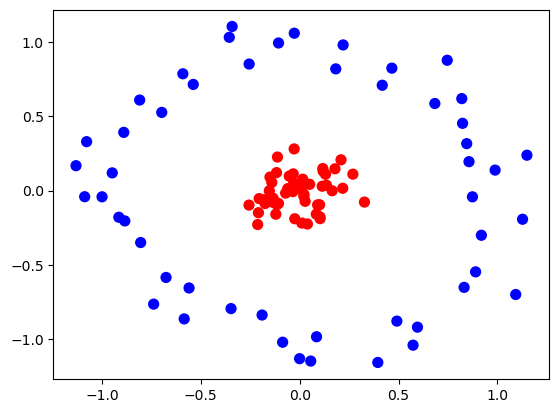

In [3]:
from sklearn.datasets._samples_generator import make_circles
X,y = make_circles(100, factor=0.1, noise=0.1)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='bwr');

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)

In [6]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.2

In [8]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

C:\Users\dhanr\AppData\Local\Temp\ipykernel_21496\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


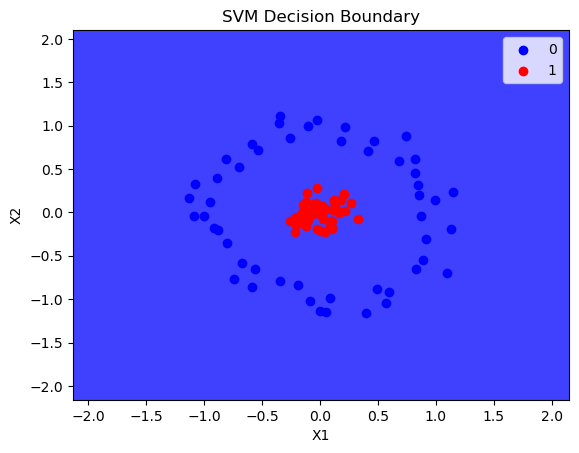

In [9]:
plot_decision_boundary(X, y, classifier)

In [10]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

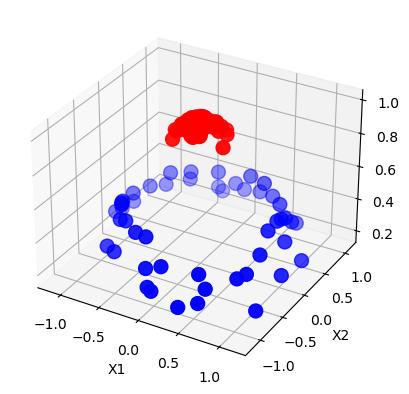

In [11]:
plot_3d_plot(X,y)

In [12]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)

In [13]:
accuracy_score(y_test, y_pred)

1.0

C:\Users\dhanr\AppData\Local\Temp\ipykernel_21496\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


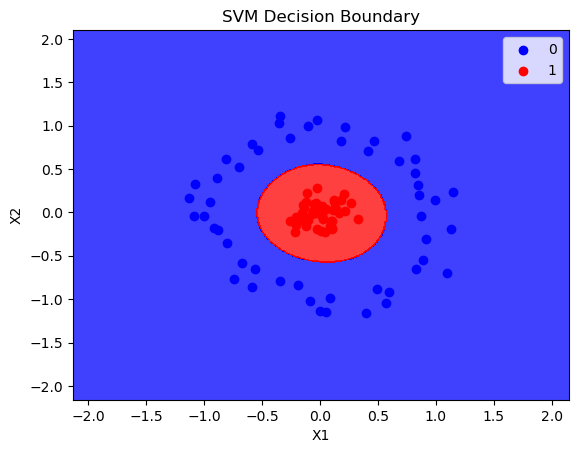

In [14]:
plot_decision_boundary(X, y, rbf_classifier)

In [15]:
poly_classifier = SVC(kernel="poly",degree=2)
poly_classifier.fit(X_train, y_train)
y_pred = poly_classifier.predict(X_test)

In [16]:
accuracy_score(y_test, y_pred)

1.0

C:\Users\dhanr\AppData\Local\Temp\ipykernel_21496\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


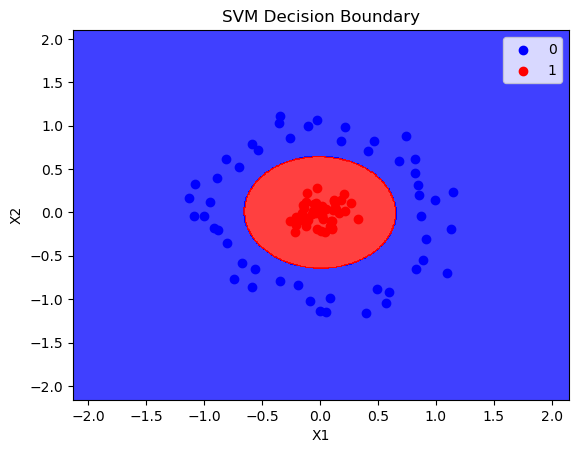

In [17]:
plot_decision_boundary(X, y, poly_classifier)

In [18]:
X

array([[ 1.30327486e-01,  1.09844015e-01],
       [ 4.65869515e-01,  8.25215641e-01],
       [ 8.55941609e-01,  1.94738526e-01],
       [-8.84611525e-01, -2.04935215e-01],
       [-2.12631321e-01, -2.29071504e-01],
       [-3.47368147e-01, -7.96113078e-01],
       [-8.09456256e-01,  6.10266057e-01],
       [-2.50687752e-02, -1.90330293e-01],
       [-6.97812326e-01,  5.26967059e-01],
       [-9.14828253e-01, -1.80144906e-01],
       [-1.07310065e-01,  9.94823028e-01],
       [ 5.56424776e-02, -1.14990202e+00],
       [ 1.35069314e-01,  3.58949083e-02],
       [-1.34829734e-01, -5.17308837e-02],
       [ 1.16439811e-01,  1.48065010e-01],
       [ 8.44406833e-01,  3.16198079e-01],
       [ 7.45804217e-01,  8.78504364e-01],
       [-7.38840658e-01, -7.65994732e-01],
       [-7.13314593e-02, -1.72186262e-02],
       [ 1.18395397e-01,  1.30047073e-01],
       [-1.78058773e-01, -6.22871344e-02],
       [ 2.72323911e-02, -7.26115755e-02],
       [ 2.09065852e-02, -3.87170160e-02],
       [ 9.

In [19]:
np.exp(-(X**2)).sum(1)

array([1.97116497, 1.31102259, 1.44342732, 1.41611553, 1.90467398,
       1.41690506, 1.20838966, 1.96379443, 1.37203102, 1.40111499,
       1.36024887, 1.26343705, 1.98063407, 1.97931268, 1.96484859,
       1.39501466, 1.03556437, 1.13546148, 1.99462831, 1.96931029,
       1.96492023, 1.99400011, 1.99806513, 1.34313194, 1.34765709,
       1.21190422, 1.89240716, 1.41965913, 1.40787545, 1.3710718 ,
       1.15399218, 1.94896326, 1.21008505, 1.99890638, 1.9863812 ,
       1.18350666, 1.99391627, 1.18378636, 1.24410038, 1.96806585,
       1.30464153, 1.91533526, 1.97721963, 1.97784189, 1.91815453,
       1.39281485, 1.35799123, 1.19365287, 1.9621304 , 1.31027583,
       1.05730146, 0.91505606, 1.44428491, 1.99573385, 1.99918748,
       1.98080669, 1.9267129 , 1.32376892, 1.95414301, 1.46455041,
       1.97346387, 1.38037233, 1.98253561, 1.97658894, 1.9987332 ,
       1.33559841, 1.95360057, 1.97506467, 1.98780637, 1.32188174,
       1.34387502, 1.98630898, 1.93764099, 1.92346067, 1.22466

In [20]:
X_new=np.exp(-(X**2))

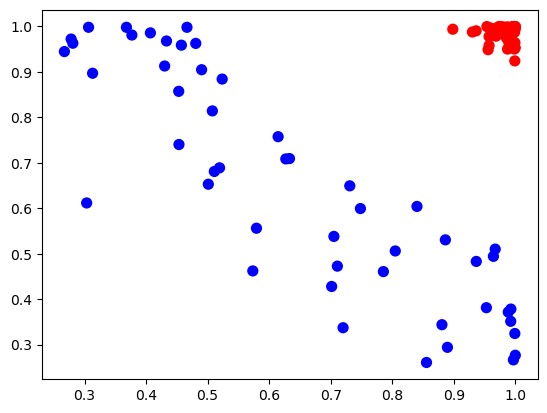

In [21]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, s=50, cmap='bwr')